In [1]:
### DATA 515 - Homework 1
### Corey Christopherson
### 4-14-2020
#
# TASKS
#
# Given the CSV file containing the counts of bicycles crossing the Fremont Bridge since 2012 
# Fremont_Bridge_Bicycle_Counter.csv
#
# 1. Read the CSV file into a pandas dataframe. (1 pt)
# 2. Add columns to the dataframe containing: ( 3 pt)
#    i.   The total (East + West) bicycle count
#    ii.  The hour of the day
#    iii. The year
# 3. Create a dataframe with the subset of data from the year 2016 (1 pt)
# 4. Use pandas + matplotlib to plot the counts by hour. (1 pt)
#    (i.e. hour of the day on the x-axis, total daily counts on the y-axis)
# 5. Use pandas to determine what is (on average) the busiest hour of the day (1 pt)
#
# NOTES
# - 
# 

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os as os

In [10]:
# Paths
path = os.getcwd()
data_path = os.path.join(os.path.expanduser('~'), 'data515_hw1', 'project', 'data')

In [9]:
#####                                          #####
### 1. Read the CSV file into a pandas dataframe ###
#####                                          #####

raw_data = pd.read_csv('{}/Fremont_Bridge_Bicycle_Counter.csv'.format(data_path),
                       parse_dates=['Date'], infer_datetime_format=True)

In [21]:
# Inspect data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65688 entries, 0 to 65687
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          65688 non-null  datetime64[ns]
 1   Fremont Bridge Total          65678 non-null  float64       
 2   Fremont Bridge East Sidewalk  65678 non-null  float64       
 3   Fremont Bridge West Sidewalk  65678 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 MB


In [28]:
# Check null values
raw_data[raw_data.isnull().any(1)]

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
6105,2013-06-14 09:00:00,NaN,NaN,NaN
6106,2013-06-14 10:00:00,NaN,NaN,NaN
12530,2014-03-09 02:00:00,NaN,NaN,NaN
21266,2015-03-08 02:00:00,NaN,NaN,NaN
22331,2015-04-21 11:00:00,NaN,NaN,NaN
22332,2015-04-21 12:00:00,NaN,NaN,NaN
30170,2016-03-13 02:00:00,NaN,NaN,NaN
38906,2017-03-12 02:00:00,NaN,NaN,NaN
47642,2018-03-11 02:00:00,NaN,NaN,NaN
56378,2019-03-10 02:00:00,NaN,NaN,NaN


In [30]:
# Remove NULL values and set data types
raw_data = raw_data[~raw_data.isnull().any(1)]
int_cols = ['Fremont Bridge Total', 'Fremont Bridge East Sidewalk','Fremont Bridge West Sidewalk']
raw_data.loc[:,int_cols] = raw_data.loc[:,int_cols].astype(int)

In [34]:
raw_data.head(2)

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2012-10-03 00:00:00,13,4,9
1,2012-10-03 01:00:00,10,4,6


In [ ]:
#####                                                                                        #####
### 2. Add columns to the dataframe containing: total bicycle count, The hour of the day, year ###
#####                                                                                        #####

raw_data.loc[:,'Total Bicycle Count'] = (raw_data.loc[:,'Fremont Bridge East Sidewalk'] + 
                                         raw_data.loc[:,'Fremont Bridge West Sidewalk'])

raw_data.loc[:,'Hour'] = raw_data.loc[:,'Date'].dt.hour

raw_data.loc[:,'Year'] = raw_data.loc[:,'Date'].dt.year

In [44]:
raw_data.head(2)

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total Bicycle Count,Hour,Year
0,2012-10-03 00:00:00,13,4,9,13,0,2012
1,2012-10-03 01:00:00,10,4,6,10,1,2012


In [47]:
#####                                                              #####
### 3. Create a dataframe with the subset of data from the year 2016 ###
#####                                                              #####

data_2016 = raw_data[raw_data['Year']==2016].reset_index(drop=True)

In [48]:
data_2016.head(2)

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total Bicycle Count,Hour,Year
0,2016-01-01 00:00:00,18,9,9,18,0,2016
1,2016-01-01 01:00:00,15,3,12,15,1,2016


Text(0, 0.5, 'Total Bicycle Count')

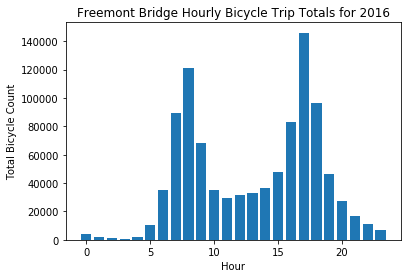

In [60]:
#####                                                                                                   #####
### 4. Use pandas + matplotlib to plot the counts by hour (hour x-axis, total daily counts on the y-axis) ###
#####                                                                                                   #####

plt.bar('Hour','Total Bicycle Count',
        data=data_2016.groupby('Hour')['Total Bicycle Count'].sum().reset_index())
plt.title("Freemont Bridge Hourly Bicycle Trip Totals for 2016")
plt.xlabel("Hour")
plt.ylabel("Total Bicycle Count")

In [66]:
#####                                                                        ######
### 5. Use pandas to determine what is (on average) the busiest hour of the day ###
#####                                                                        ######

max_hr = data_2016.groupby('Hour')['Total Bicycle Count'].mean().reset_index().sort_values('Total Bicycle Count').iloc[-1,0]
print('The busiest hour of the day (on average) for the Freemont Bridge bicycle traffic in 2016 is {}:00'.format(max_hr))

The busiest hour of the day (on average) for the Freemont Bridge bicycle traffic in 2016 is 17:00
